In [1]:
import os, sys, re, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns

now = datetime.datetime.now()
today = str(now.year)+'-'+str(now.month)+'-'+str(now.day)


try:
    scriptdir
except NameError:
    print('No script directory')
    scriptdir = !pwd
    

animalDataPath= scriptdir[0]+'/NHP_masterfiles/AnimalDataFromAnalysisII.csv'
outputPath = scriptdir[0]+'/NHP_outputFiles'

animalDf = pd.read_csv(animalDataPath, sep=',')
animalDf = animalDf.dropna(how='all')
animalDf = animalDf.drop('Unnamed: 4', axis=1)


No script directory


In [2]:

elisaDataPath = scriptdir[0]+'/NHP_masterfiles/191030_all_ELISA_data_conc.csv'

elisaDf = pd.read_csv(elisaDataPath)#, sep='\t')
header = elisaDf.columns.values.tolist()

##parsing numbers
for colums in header:
    elisaDf[colums] = pd.to_numeric(elisaDf[colums])
##renaming x colum to dpi
elisaDf.rename(columns={header[0]:'dpi'}, inplace=True)
##melting column
elisaDf = pd.melt(elisaDf, id_vars =['dpi'], var_name ='id')

#fixing animal names if necessary
#elisaDf['id'] = elisaDf['id'].str.strip()
#elisaDf['id'] = elisaDf['id'].str.replace(r'(\S+)', r'rh\1')

elisaDf=pd.merge(elisaDf, animalDf, on='id', how='right')
elisaDf.dropna(inplace=True)

elisaDf.to_csv(scriptdir[0]+'/NHP_masterfiles/'+today+'_ELISAMasterTable.csv')


In [3]:
### shared parameters for plotting

psize=3.5

#defining fonts
titlefont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'bold', 'verticalalignment': 'baseline','horizontalalignment': 'center'}
tickfont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'normal'}
labelfont = {'fontname':'Arial', 'fontsize': 14, 'fontweight' : 'bold'}

sns.set_context("paper", font_scale=1.6)
def formatPlot(tmpax, subdf):
    ##setting simpler titles
    [plt.setp(ax.texts, text="") for ax in tmpax.axes.flat] # remove the original texts                                         
    tmpax.set_titles(row_template = '{row_name}', col_template = '{col_name}')
    tmpax.fig.subplots_adjust(wspace=.2, hspace=.2)
      
    tmpax.set_axis_labels('day', 'µg/ml')
    
    
    xmax=90#subdf.dpi.max()
    xmin=subdf.dpi.min()
    #ymax=subdf.value.max()
    ymax = 18
    ymin=0
    xoffset=1.3
    i=0
    for row in tmpax.axes:
        for plot in row:
            plot.tick_params(axis='both', labelsize=tickfont['fontsize'], length=5, width=1)
            for tick in plot.get_xticklabels():
                tick.set_fontname(tickfont['fontname'])
                tick.set_fontweight(tickfont['fontweight'])
            for tick in plot.get_yticklabels():
                tick.set_fontname(tickfont['fontname'])
                tick.set_fontweight(tickfont['fontweight'])
            
            plot.set_title(plot.get_title('center'), **titlefont)
            plot.set_ylabel(plot.get_ylabel(), **labelfont)
            plot.set_xlabel(plot.get_xlabel(), **labelfont)
        
            plot.facecolor=(0,1,0,0.1)
            plot.axhline(0, alpha=0.5, color='grey', ls=':')
            plot.axhline(100, alpha=0.5, color='grey', ls=':')
            #plot.set_xscale('log')
            #plot.set_yscale('log')
            #plot.set_xlim([xmin/xoffset, xmax*xoffset])
            #plot.set_ylim([-30, 120])
            plot.set_ylim([ymin, ymax])
            plot.spines['right'].set_visible(True)
            plot.spines['right'].set_linewidth(1)
            plot.spines['left'].set_visible(True)
            plot.spines['left'].set_linewidth(1)
            plot.spines['top'].set_visible(True)
            plot.spines['top'].set_linewidth(1)
            plot.spines['bottom'].set_visible(True)
            plot.spines['bottom'].set_linewidth(1)

In [4]:
##generating symbol and color dict

testDf=animalDf[['id','status']]
testDf=testDf.replace(to_replace ='protected', value = 'o', regex = True)
testDf=testDf.replace(to_replace ='infected', value = 's', regex = True) 
symboldict=dict(zip(testDf.id, testDf.status))

testDf=animalDf[['id','status']]
testDf=testDf.replace(to_replace ='protected', value = "#565656", regex = True)
testDf=testDf.replace(to_replace ='infected', value = '#BB270B', regex = True) 
infDict=dict(zip(testDf.id, testDf.status))


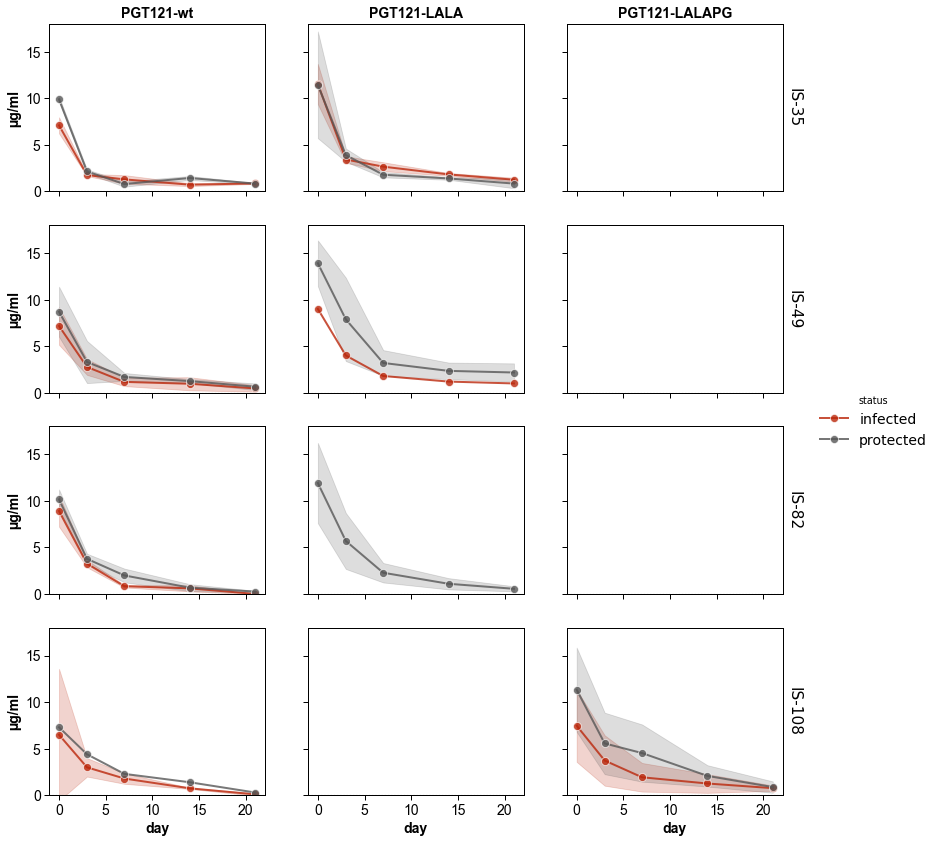

In [5]:
###Suppl. Figure 1B

toPlot= elisaDf[elisaDf['mab'] != "DEN3-wt"] 
toPlot

g = sns.FacetGrid(toPlot, margin_titles=True,
                  col= 'mab',
                  row="experiment",
                  height= 3,aspect=1.3, 
                  hue="status",
                  palette =  {'infected': '#BB270B', 'protected': '#565656'}
                 )

g.map(sns.lineplot, "dpi", "value", alpha = .8, markersize=8, ci="sd", err_style='band', marker="o", linewidth=2.0)#markeredgewidth=2, Markeredgecolor='none'

g.add_legend()
formatPlot(g, toPlot)

svgPath=outputPath+'/'+today+'_pgt121ELISAexpBinned.svg'
pdfPath=outputPath+'/'+today+'_pgt121ELISAexpBinned.pdf'

#print(svgPath)
g.savefig(svgPath)
g.savefig(pdfPath)


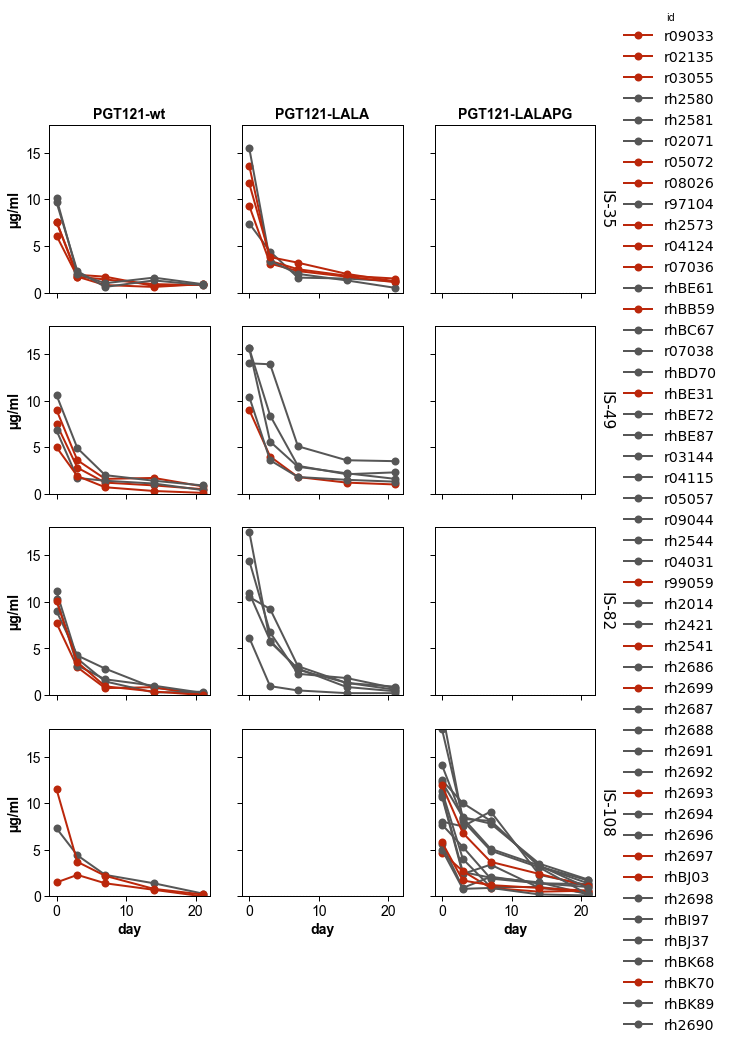

In [6]:
##suppl. Figure 1A
toPlot= elisaDf[elisaDf['mab'] != "DEN3-wt"] 

g = sns.FacetGrid(toPlot, margin_titles=True,
                  col= 'mab',
                  row="experiment",
                  height= 3,aspect=1, 
                  hue="id",
                  palette = infDict,
                  #hue_kws={}
                 )

g.map(sns.lineplot, "dpi", "value", alpha = 1, markersize=8, markeredgewidth=2, marker= "o", Markeredgecolor='none', ci="sd", err_style='band',  linewidth=2.0)

g.add_legend()
formatPlot(g, toPlot)

svgPath=outputPath+'/'+today+'pgt121ELISAexp.svg'
pdfPath=outputPath+'/'+today+'pgt121ELISAexp.pdf'

g.savefig(svgPath)
g.savefig(pdfPath)